In [20]:
import pandas as pd
import geopandas as gpd


#---------------------------------------------------
# for plotting purposes we use this iPython magic
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (19, 19)
#---------------------------------------------------

Populating the interactive namespace from numpy and matplotlib


In [58]:
# read data
df = pd.read_csv('Combined_sipalaga_all.csv', delimiter=';')
print(f'We have {len(df)} records')

# exclude smm from columns
cols = ['station', 'index', 'location', 'province', 'lon', 'lat', 'GWL_max', 'GWL_min', 'GWL_rata', 'SM_max', 'SM_min', 'SM_rata', 'Total']
print(f'We have {len(df[cols].dropna())} records afte dropping all NaNs')
# and drop nans
df_no_nans = df[cols].dropna()

print(f'We have {len(df_no_nans.station.unique())} different stations for Soil Moisture Estimates')

We have 39787 records
We have 30316 records afte dropping all NaNs
We have 89 different stations for Soil Moisture Estimates


In [82]:
stat_high = stations.stasiun[(stations['corr_sm'] >= 0.5)]
#df_no_nans = df_no_nans[df_no_nans.station.isin(stat_high)].copy()

for province in df_no_nans.province.unique():
    
    df_to_plot = df_no_nans[df_no_nans.province == province]
    sns.set(font_scale = 2)
    ax = sns.boxplot(x='station', y='SM_rata', data=df_to_plot)
    plt.xticks(rotation=45, horizontalalignment='right', fontsize='small')
    plt.yticks(horizontalalignment='right', fontsize='small')
    plt.title(province)
    plt.savefig(f'figures/groundstations/sm/{province}.png')
    plt.close()
    

In [61]:
df_no_nans.to_date

,station,index,location,province,lon,lat,GWL_max,GWL_min,GWL_rata,SM_max,SM_min,SM_rata,Total
115,BRG_150503_01,06/07/2019,BETUNG,JAMBI,103.928286,-1.545325,-3.040,-3.040,-3.040,62.413,61.607,62.024,0.000
116,BRG_150503_01,07/07/2019,BETUNG,JAMBI,103.928286,-1.545325,-3.040,-3.040,-3.040,61.205,61.022,61.095,0.000
117,BRG_150503_01,08/07/2019,BETUNG,JAMBI,103.928286,-1.545325,-3.040,-3.040,-3.040,60.367,60.185,60.249,0.000
118,BRG_150503_01,09/07/2019,BETUNG,JAMBI,103.928286,-1.545325,-3.040,-3.040,-3.040,60.877,60.767,60.807,0.000
119,BRG_150503_01,10/07/2019,BETUNG,JAMBI,103.928286,-1.545325,-3.040,-3.040,-3.040,60.258,60.112,60.151,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39773,kecil1,26/10/2019,PM-Paduran Mulya,KALIMANTAN TENGAH,113.805611,-2.856089,-3.020,-3.025,-3.021,9.995,9.865,9.953,15.125
39774,kecil1,27/10/2019,PM-Paduran Mulya,KALIMANTAN TENGAH,113.805611,-2.856089,-3.022,-3.025,-3.023,9.930,9.865,9.912,0.000
39775,kecil1,31/10/2019,PM-Paduran Mulya,KALIMANTAN TENGAH,113.805611,-2.856089,-3.023,-3.023,-3.023,9.930,9.930,9.930,0.000
39776,kecil1,02/11/2019,PM-Paduran Mulya,KALIMANTAN TENGAH,113.805611,-2.856089,-3.023,-3.023,-3.023,9.930,9.930,9.930,0.000


In [65]:
df_no_nans['index'] = pd.to_datetime(df_no_nans['index'])
df_no_nans = df_no_nans.set_index('index').dropna()

<AxesSubplot:xlabel='index'>

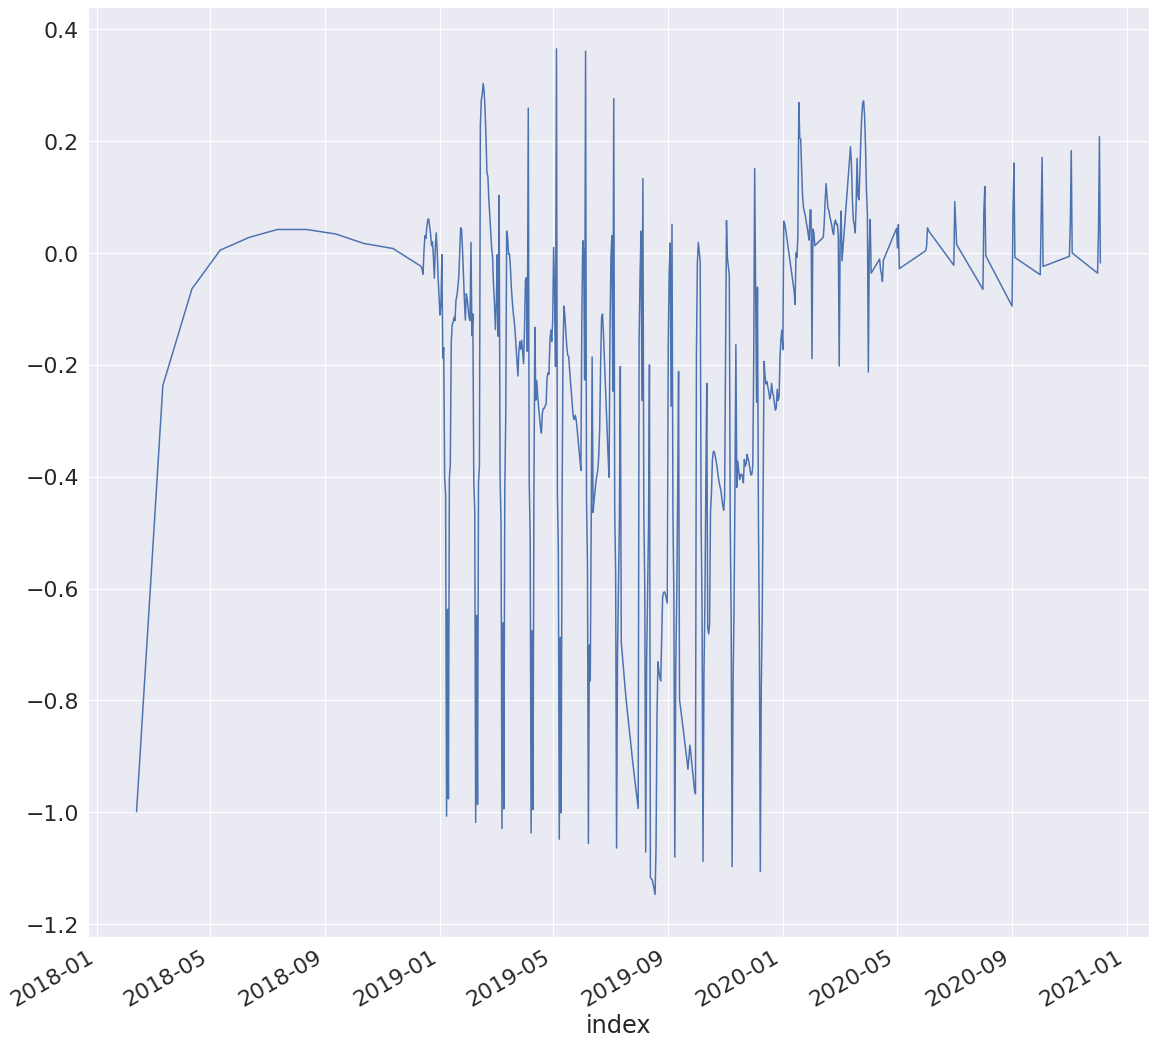

In [105]:
df_no_nans.GWL_rata[df_no_nans.station == 'BRG_621103_05'].plot()

In [77]:
stations[(stations['corr_sm'] >= 0.5)].sort_values('corr_gwl', ascending=False)

,stasiun,corr_gwl,corr_sm,provinsi,lon,lat,geometry
55,BRG_621108_01,0.936204,0.759064,KALIMANTAN TENGAH,113.763100,-2.902878,"POLYGON ((113.76355 -2.90335, 113.76265 -2.903..."
53,BRG_621107_07,0.935850,0.705683,KALIMANTAN TENGAH,114.192400,-2.603828,"POLYGON ((114.19294 -2.60422, 114.19204 -2.604..."
42,BRG_621103_05,0.875219,0.837405,KALIMANTAN TENGAH,113.965700,-2.140190,"POLYGON ((113.96657 -2.14069, 113.96567 -2.140..."
52,BRG_621107_06,0.860496,0.579794,KALIMANTAN TENGAH,114.169500,-2.548813,"POLYGON ((114.16958 -2.54942, 114.16869 -2.549..."
46,BRG_621105_03,0.846603,0.613992,KALIMANTAN TENGAH,114.175100,-2.838133,"POLYGON ((114.17587 -2.83868, 114.17497 -2.838..."
87,kecil1,0.838874,0.963317,KALIMANTAN TENGAH,113.805611,-2.856089,"POLYGON ((113.80577 -2.85664, 113.80487 -2.856..."
13,BRG_150710_03,0.835859,0.729541,JAMBI,103.773201,-1.298489,"POLYGON ((103.77338 -1.29896, 103.77248 -1.298..."
41,BRG_621103_04,0.833640,0.759049,KALIMANTAN TENGAH,113.976100,-2.103473,"POLYGON ((113.97645 -2.10385, 113.97555 -2.103..."
70,BRG_910111_01,0.832011,0.758535,PAPUA,140.216300,-8.205198,"POLYGON ((140.21713 -8.20521, 140.21624 -8.205..."
50,BRG_621107_04,0.827558,0.613158,KALIMANTAN TENGAH,114.172200,-2.436650,"POLYGON ((114.17228 -2.43713, 114.17138 -2.437..."
